# Regularization-Ridge-Lasso-ElasticNet-Cross Validation-Gridsearch (Un uzun Notebook)  

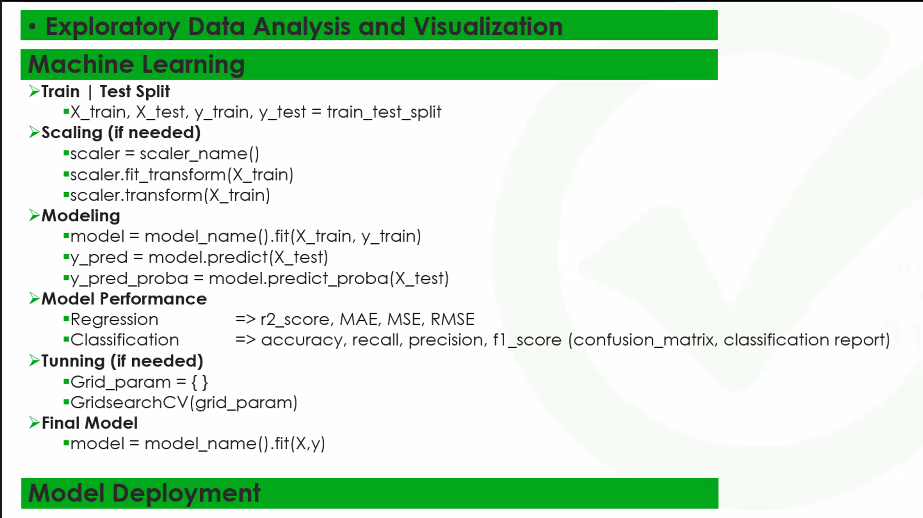

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [88]:
df = pd.read_csv("Advertising.csv")

In [89]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [90]:
#  datayı ayırıyoruz
X = df.drop("sales", axis = 1)
y = df["sales"]

In [91]:

from sklearn.preprocessing import PolynomialFeatures

In [92]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [93]:
poly_features.shape
# 56  olarak  düşünecek  56  column  var 55 feature +1 target

(200, 55)

# Train |  Test Split

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

# Scaling The Data

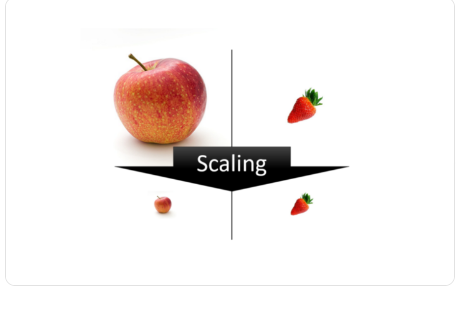

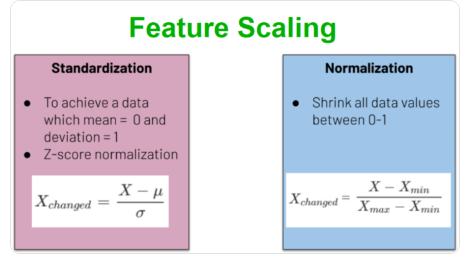

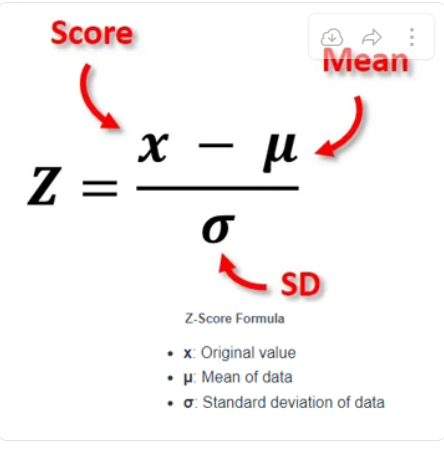

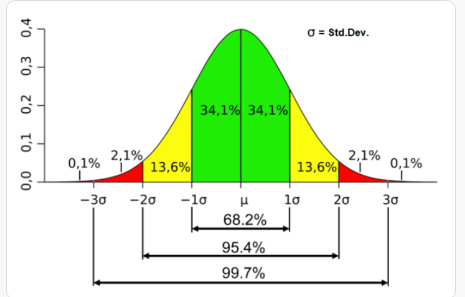

In [96]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()
#robust çok görülmez

In [97]:
scaler.fit(X_train)
# fit  herzaman train de yapılır
# biz datayı ML  ye vriyoruz   işlemi o tahmin ediyor fonk tahmin yapıyor
# scaler  içinde  bazı fonk  luşturuyor  kendisi

StandardScaler()

In [98]:
# dönüşüm var  transform yapacağız  
# transform hem traine hem teste yapıyoruz
#neden train   datasında  
# test datasına sadece   transform yapılıyor

In [99]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled
#  fit  olmadan  transform  çalışmaz

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [100]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

In [101]:
pd.DataFrame(X_train_scaled).agg(["mean","std"]).round()
#bütün ort 0  , std ları 1 şeklinde

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [102]:
pd.DataFrame(X_test_scaled).agg(["mean","std"]).round()
# bütün ort  0,   std ler  2 ye kadar  gitti , trainde öyle bir  eğitim yapptıkki  2 ye kadar çıktı

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0


# Linear  Regression

In [103]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() # linear model lm

In [104]:
lm.fit(X_train_scaled, y_train)
#scale edilmiş data ile   fit ediyoruz eğitiyoruz

LinearRegression()

In [105]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)
#tahminleri  X  datası üzerinden aldık  

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# error metricleri  import ettim 
# def ile yan yana görüyorum

In [107]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

In [108]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


In [109]:
#  overfitting  görüldü

# Multicolineratiy

In [110]:
# value = val
def color_red(val):
    if val > 0.90 and val < 1.00:
        color = 'red'
    elif val < -0.90 and val > -1.00:
        color = 'red'
    elif val == 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color:{color}'
# multicolineraty için bir   fonk bulduk   matris tablolarını  renklendiren kodu modifiye ettik.  

In [111]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)
#0. index ile  3  arasında  % 97 lik korelasyon var gibi.
#0. index ile  9  arasında  % 92 lik korelasyon var gibi.
# datamızı  sentetik olarak çoğalltmıştık  yüksek korelasyon  olanları renkli gördük ve  overfitting  olduğunu gördük
# feature secerken  bu aşama önemli     az feature ile   çok  iyi athmin yaparsak o kadar iyi
# ideal  şartları durumları arıyoruz.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

In [112]:
# feature  selection yaparken      bu  aşama önemli ince ayar  yapıyoruz. Multicolinerty   sorununu çöamliyiz

# Cross Validate (CV)

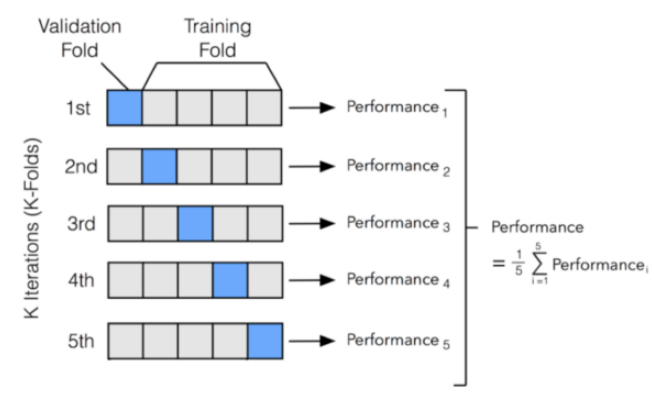

In [113]:
from sklearn.metrics import SCORERS

In [114]:
list(SCORERS.keys())
#bunun içinde hangi skorlar  var  parantez shift tab tab ile iiçne gir
# scores  iççinde  hep  negatiflerini alıyor  1 e yakınlaştırmak için

['explained_variance',
 'r2',
 'max_error',
 'matthews_corrcoef',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'positive_likelihood_ratio',
 'neg_negative_likelihood_ratio',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',

In [115]:
from sklearn.model_selection import cross_validate, cross_val_score

In [116]:
model = LinearRegression() # model tanımladık
scores = cross_validate(model, X_train_scaled, y_train, scoring= ["r2", "neg_mean_absolute_error","neg_mean_squared_error", \
                                                            "neg_root_mean_squared_error"], cv = 5)
# model içine  train setleri verip  paremetreleri  ekliyoruz cv = 5 cros validation 

In [117]:
pd.DataFrame (scores, index = range(1, 6))
# 5 defa  cross validation yaptık, default  değer 5  nekadar çok  yaparsanız o kadar  iyi
# 2. columndan  sonrası  ilgilendiriyor
# time lar biz ilgilendirmediği içn 2. columndan başaladık
# her    analizde    5  kez  skorlar aldı  buları  sırası ile gördük yorumladık

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.006630,0.002008,0.367902,-1.271247,-19.204259,-4.382266
2,0.006142,0.000000,0.879658,-0.710463,-2.713292,-1.647207
3,0.002000,0.000995,0.977560,-0.395033,-0.622901,-0.789240
4,0.002519,0.001007,0.989369,-0.418977,-0.289361,-0.537923
5,0.002999,0.001026,0.166596,-1.474093,-15.409856,-3.925539


In [118]:
# yukarıdakilerin yani skorların  ortalamalrını alıyorum
scores = pd.DataFrame(scores, index = range(1,6))
scores.iloc[:, 2: ].mean()
# her dataya  cros valitation yapacağız
# X_train_scaled  datamıza  göre test_r2  0.67 iken , test data mızda  ilkel linear test r2 skoru  0.76 ya denk gelmiş 
#tersi durumda olabilir  önmeli olan  arada fark görülmesi
# bu sebeple  CV yapıyoruz her zaman her data  da bunu yapacağız  aslonda  0,67  olduğunu gördüm.
#  böyle bir   durumda    data dengesiz   aklımmıza ne gelmeli unbalance data olmuş ilkel skor    yüksek,   CV deki düşük

test_r2                             0.676217
test_neg_mean_absolute_error       -0.853963
test_neg_mean_squared_error        -7.647934
test_neg_root_mean_squared_error   -2.256435
dtype: float64

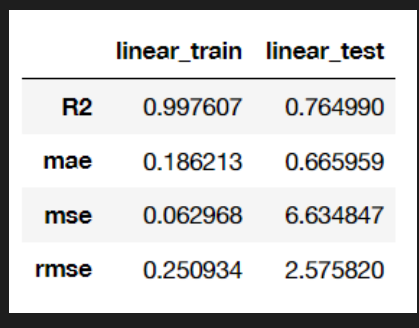

In [119]:
lm.coef_

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [120]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef_"])
lm_df
# scale yapıldı 
# 9 . featrue  en yüksek etkiyi yapıyor 115,50
# 19. feature  en düüşk etki yapıyor -103 
# etkilerini gördük   featrue selection yapabilecek hale geldik
# aldığımız her skoru böyle  dataframe   koyup  görseli  düzgün yapacağız

,lm_coef_
0,13.942084
1,-3.147845
2,0.622117
3,-58.348614
4,17.227695
5,-3.875031
6,14.688014
7,0.835494
8,-2.765824
9,115.503087


# Ridge Regression ( Ridge = Sırt demek)

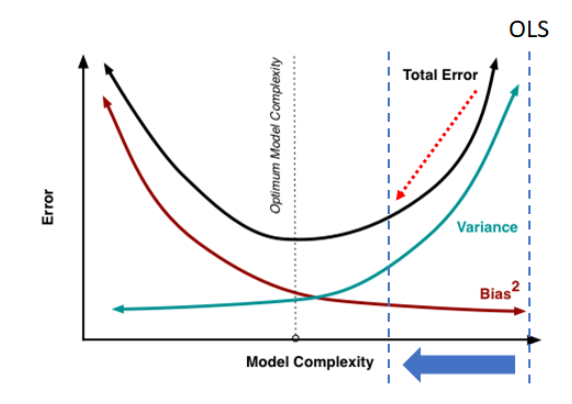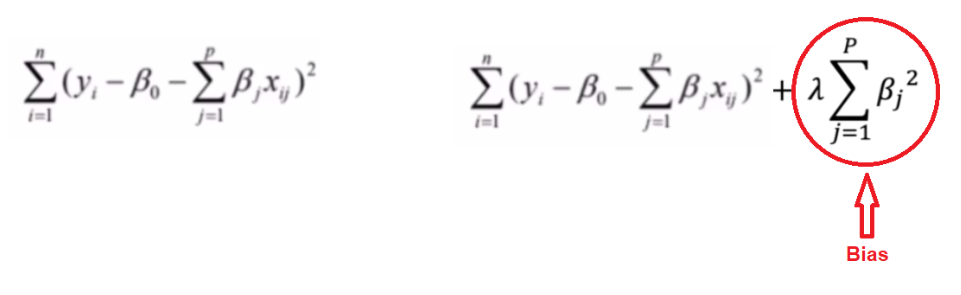

In [121]:
from sklearn.linear_model import Ridge

In [122]:
ridge_model = Ridge(alpha=1, random_state=42)
# alpha paremetresi   default olarak gelir.
#

In [123]:
ridge_model.fit(X_train_scaled, y_train)
# train data ile modeli fit ettik  

Ridge(alpha=1, random_state=42)

In [124]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)
# modelimizi eğittik

In [125]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge") # train_val fonksiyonua tahmin ve testleri veriyoruz
rs

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


In [126]:
pd.concat([ls, rs],axis =1)
# ridge_test 0.76 dan  0,98 e çıkardı
# ridge   regression    modeli  iyileştirdi 
# traini aşağıya çekti  testi  yükseltti
# 

,linear_train,linear_test,ridge_train,ridge_test
R2,0.997607,0.764990,0.988677,0.982511
mae,0.186213,0.665959,0.338149,0.482446
mse,0.062968,6.634847,0.297970,0.493743
rmse,0.250934,2.575820,0.545866,0.702669


# For Ridge Regression CV with alpha : 1

In [127]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring= ["r2", "neg_mean_absolute_error","neg_mean_squared_error", \
                                                            "neg_root_mean_squared_error"], cv = 5)

In [128]:
pd.DataFrame(scores, index = range(1,6))
#  CV ile  test r2  skoru  çok iyi çıkarken ,  rmse   skoru  0 a yaklaştı  

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.006537,0.001029,0.367902,-1.271247,-19.204259,-4.382266
2,0.002973,0.001004,0.879658,-0.710463,-2.713292,-1.647207
3,0.002573,0.000956,0.977560,-0.395033,-0.622901,-0.789240
4,0.002000,0.000998,0.989369,-0.418977,-0.289361,-0.537923
5,0.002998,0.001014,0.166596,-1.474093,-15.409856,-3.925539


In [129]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()
#  CV ile alınan sKorlar

test_r2                             0.676217
test_neg_mean_absolute_error       -0.853963
test_neg_mean_squared_error        -7.647934
test_neg_root_mean_squared_error   -2.256435
dtype: float64

In [130]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")  
# cv ile alınan skorla ridge ile alınan skorlarla neredeyse aynı

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


In [131]:
# overfitting   sorunu çözüldü.
# model de  skorlar birbiri ile  uymlu hale getirildi

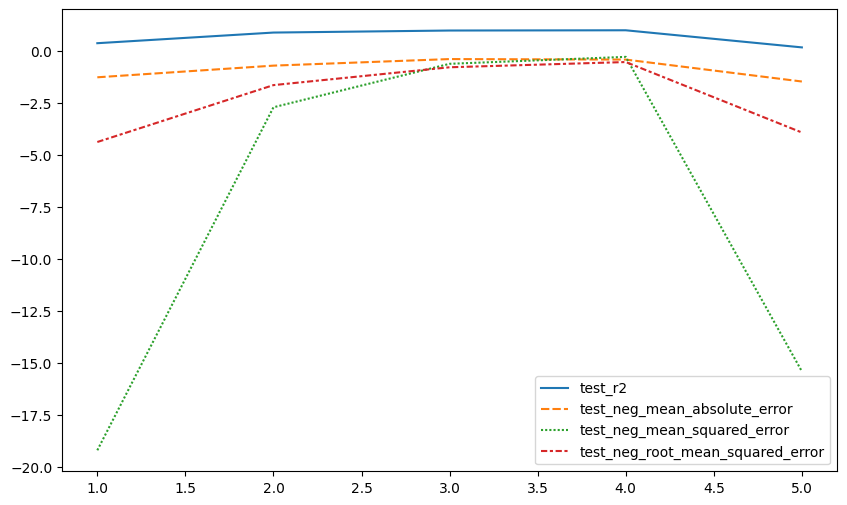

In [132]:
sns.lineplot(data = scores.iloc[:,2:])
plt.show()

In [133]:
ridge_model.coef_

array([ 3.42882194e+00,  6.89086255e-01,  1.70305310e-01, -9.10849850e-01,
        2.72307731e+00,  1.12909099e-01, -4.04686020e-01,  2.87949856e-01,
       -9.19372975e-02, -1.01453529e+00, -7.53444103e-02, -7.08634181e-01,
        1.47325425e+00,  1.48905234e-01,  5.40673712e-03, -4.71916072e-01,
        3.11276849e-02, -9.14237139e-02,  1.09396990e-01, -2.94351259e-01,
       -6.99938835e-02, -1.79886016e-01, -4.82892097e-01, -2.41549754e-01,
       -7.04618089e-02,  7.81238085e-01, -3.29077891e-02,  2.16163202e-03,
       -2.86797937e-02, -1.86742942e-01,  1.13037228e-02, -7.09241901e-02,
       -3.59743483e-02,  1.26281214e-01,  4.53132216e-01,  4.90793990e-01,
        4.92974171e-01, -2.88060554e-01,  2.71083972e-01,  3.21890659e-01,
       -8.29982648e-01, -2.03685335e-01,  1.35189763e-01, -9.80952741e-03,
        3.54289982e-01, -1.69829768e-01,  1.01346413e-01, -3.94717549e-02,
       -2.36644809e-01,  1.65346682e-01,  3.01969498e-02,  9.30440340e-03,
        2.46705050e-02, -

In [134]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])
# reidge model = rm  yi df olarak görelim

In [135]:
pd.concat([lm_df, rm_df], axis =1)
# ridge    regression     bazı feature larda   katsayısını  115 ten -1  e çekmiş  bizim gözümüzde çok önemli görünen feature 
#  etkisini çok azaltmış 
# ridge  ile   feature  seçimi yapılmaz


,lm_coef_,ridge_coef_1
0,13.942084,3.428822
1,-3.147845,0.689086
2,0.622117,0.170305
3,-58.348614,-0.910850
4,17.227695,2.723077
5,-3.875031,0.112909
6,14.688014,-0.404686
7,0.835494,0.287950
8,-2.765824,-0.091937
9,115.503087,-1.014535


# Choosing best alpha value with Cross-Validation

In [136]:
from sklearn.linear_model import RidgeCV

In [137]:
#alpha  değeri   formüde  Lmada oluyor
# bu bir hyperparametredir. 
alpha_space = np.linspace(0.01, 1, 100)
alpha_space
# 100  tane   datamız var
# grid search te  otomatize edecğiz şimdilk manuel

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [138]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 5, scoring = "neg_root_mean_squared_error")
# burada  alpha  değerleri ile eğittik  alpha _space yukarıda   atadık  ve  modele soktuk
# aynı zamanda  eğitimde cv 5  scoring neg_root_mean_squared_error kullandık

In [139]:
ridge_cv_model.fit(X_train_scaled, y_train)
# herbir alpha için 5 kz CV yapıyor 500 defa CV yaptı

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [140]:
ridge_cv_model.alpha_
# en iyi alpha değerini  veriyor

0.02

In [141]:
ridge_cv_model.best_score_ ##  rmse  skoru

-0.65304065195541

In [142]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [143]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.994491,0.983643
mae,0.244842,0.442087
mse,0.144977,0.461803
rmse,0.380758,0.679561


In [144]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561


In [145]:
ridge_cv_model.coef_
# df  haline  getiriyoruz

rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.02"])

In [146]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)
# burada  katsayı  karşılaştırmasonı yapıyoruz
# alpha   büyüdükçe  sıfıra yaklaştırma optimum çıkıyor

,lm_coef_,ridge_coef_1,ridge_cv_coef_0.02
0,13.942084,3.428822,6.383047
1,-3.147845,0.689086,0.709275
2,0.622117,0.170305,0.478838
3,-58.348614,-0.910850,-8.015483
4,17.227695,2.723077,3.997813
5,-3.875031,0.112909,-0.714940
6,14.688014,-0.404686,-0.509197
7,0.835494,0.287950,0.727012
8,-2.765824,-0.091937,-0.883005
9,115.503087,-1.014535,2.244645


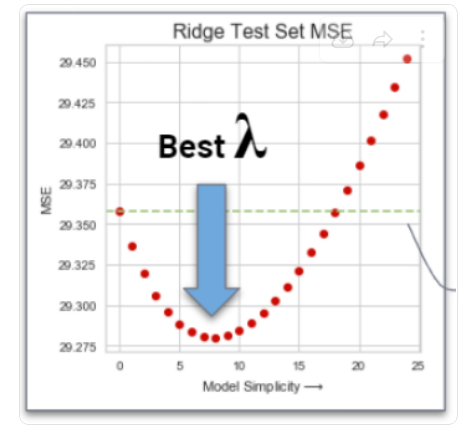

# LASSO

In [147]:
from sklearn.linear_model import Lasso, LassoCV


In [148]:
lasso_model = Lasso(alpha=1, random_state=42)# düz lasso alpha  biz  bu parametre ile oynuyoruz dmektir, random  ortak çalışma da herkes aynı sonucu almalı
lasso_model.fit(X_train_scaled, y_train)


Lasso(alpha=1, random_state=42)

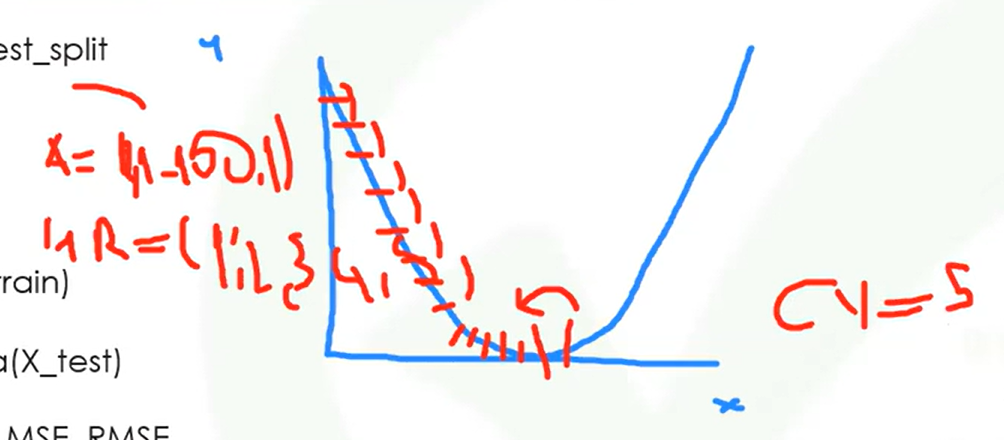

In [149]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)
# prediction yapıyoruz
# modelin içine  scale ettiğimiz datamızı veriyoruz

In [150]:
lss = train_val(y_train,y_train_pred, y_test, y_pred,"lasso")
lss
#lss LASSO  demek
# skorlar ne oldu kıyaslayalım   lss  vs ridge  atamalar  önemli    en son tabloda  komple görmek  için
# atamalar  neden önemli   çalışma  sonuntda  tüm tabloda  görmek için
# sonuca  göre  train ve test datası arasında  uym var  
#  ancak  datamızda  %98  görmüşken burada  % 91 leri gördük   ne düşünüürz
# underfitting  var dır hyper  parametrelerle oynamlıyız  bizim modelimiz daha eğitilmeli  sonucuna  varırız
# hyperlerle   oynamaya devam ediyoruz

,lasso_train,lasso_test
R2,0.919650,0.918590
mae,1.018355,1.017959
mse,2.114491,2.298390
rmse,1.454129,1.516044


In [151]:
# yan yana görmek için konkat yaplım

In [152]:
pd.concat([ls, rs, rcs, lss], axis =1)
# Bütün modellerden aldığımız skorları buraya yazdık train ve test skorları toplu gördük
# ls =linear regression
# rs = ridge reg.
# ridge- cross valiadtion
# lss = lasso
#

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044


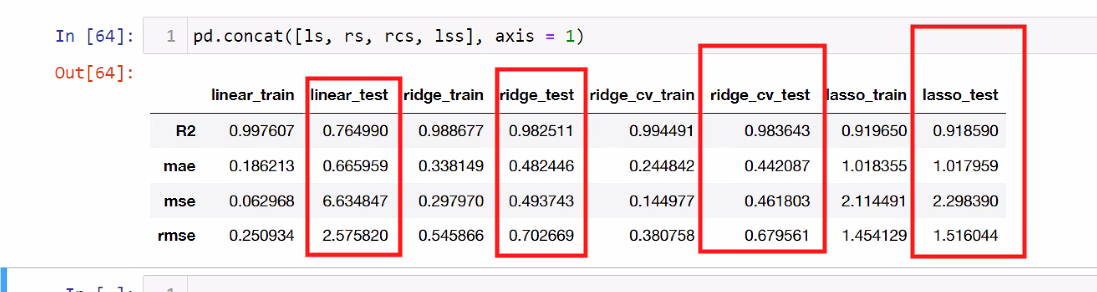

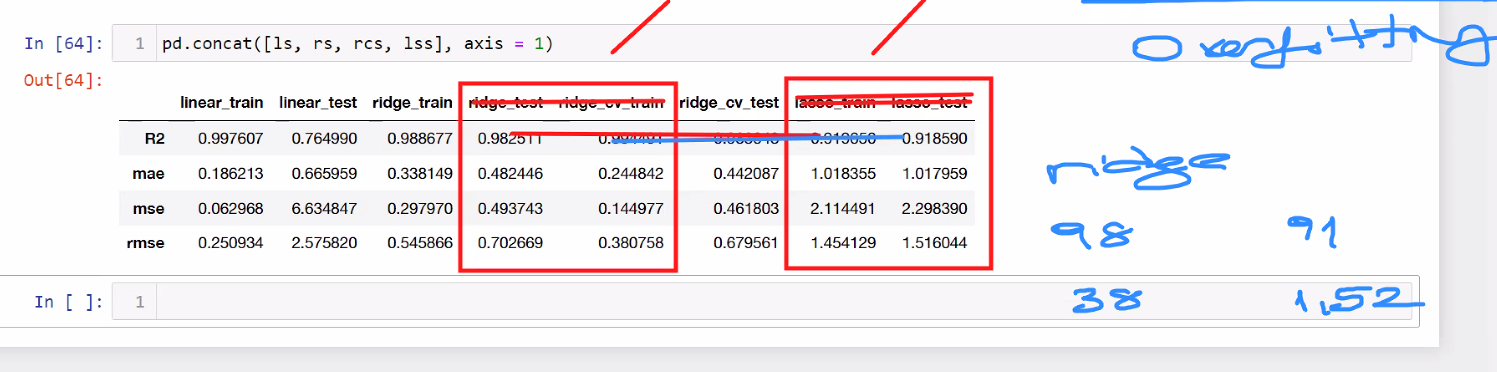

# For Lasso CV with Default Alpha : 1

In [153]:
model = Lasso(alpha=1, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [154]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.000995,0.001507,0.924246,-1.155268,-2.301550,-1.517086
2,0.001008,0.000998,0.955624,-0.656358,-1.000530,-1.000265
3,0.002003,0.000998,0.888327,-1.072936,-3.099952,-1.760668
4,0.001002,0.001617,0.896199,-1.255165,-2.825429,-1.680901
5,0.001900,0.001007,0.903545,-1.056538,-1.783470,-1.335466


In [155]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()
# df  çevirdik  
# ortalamasını aldık
# modellerde kıyası böyle yapıyoruz

test_r2                             0.913588
test_neg_mean_absolute_error       -1.039253
test_neg_mean_squared_error        -2.202186
test_neg_root_mean_squared_error   -1.458877
dtype: float64

In [156]:
# burada  lasso  train  ile   classo cv  arsında   uyumu gördük
# ama  buradaki skorlarda  daha iyi skorlar alıdıpımız 
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.919650,0.918590
mae,1.018355,1.017959
mse,2.114491,2.298390
rmse,1.454129,1.516044


In [157]:
lasso_model.coef_
#  2 tane feature kaldı her yeri temizlemiş
# ridge  55 feature    vardı lasso da iki tane kaldı
# müsteriye sorulacak   2 feature  % 98 mi, 55 feature  ile % 91 mi karaı müsteri verir
# model katsayıalrına  bakıyorum
# alpha ile  bira ounayalım  çok kelle almış
# 55  te kala kala  2 tane kaldı

array([0.6960164 , 0.        , 0.        , 0.        , 3.49094634,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [158]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])
# df le skorlarımızı gördük
# data frame  yaptık

In [159]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)
#55 tane feature  katsayıalrına baktık
# tek feature   ile   tahmin yapıyor demekki  TV nin   etkisi ispatlandı
# burada  columnsların katsayılarını  farklı alpha   değerlerinde baktık

,lm_coef_,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1
0,13.942084,3.428822,6.383047,0.696016
1,-3.147845,0.689086,0.709275,0.000000
2,0.622117,0.170305,0.478838,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000
4,17.227695,2.723077,3.997813,3.490946
5,-3.875031,0.112909,-0.714940,0.000000
6,14.688014,-0.404686,-0.509197,0.000000
7,0.835494,0.287950,0.727012,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000
9,115.503087,-1.014535,2.244645,0.000000


# Choosing best alpha value with Cross-Validation

In [160]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)
# default 1000, max a değiştir  100000,  iterasyon yapıyor  skorlara  etkisi yok    itrasyon yaparken kesilmesin diye
# sayısını artırıyor
#alpha_space   yukarıdaki  değerleri verdik
# 100 * 5 *

In [161]:
lasso_cv_model.fit(X_train_scaled, y_train)
# fit ediyoruz

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [162]:
lasso_cv_model.alpha_
# alpha  değerimiz  sınırda çıktı   bu değer    best  skor   
# bu ne demek   0 olması sınırda demek neyi vercez 0 -1 arası   sıfıra çok yanaşırsak  linear regression  döner
# yani alpha ya   sen 0.01 sin diyor 0 olamsı  sınırda  demek   alpha  = 0 olursa 
#  formülde  bias   akledik  lamda  ile   fakat  pythonda  lamda  başka fonk d kullanıldığından   lamda ya  ALpha  diyoruz

0.01

In [163]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_)
# alpha nın  en iyi   hangi indexte    bulunur onu veren kod.
alpha_space[::-1]
# bu kod linspace ters çeviriyor  

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [164]:
lasso_cv_model.mse_path_
#  tüm değerleri getiriyor model içindeki değerleri   görüyoruz

array([[2.30154971, 1.00052954, 3.09995194, 2.82542881, 1.78347009],
       [2.27241089, 0.98732363, 3.0715778 , 2.79436098, 1.75871518],
       [2.24354622, 0.97429271, 3.04348405, 2.76352248, 1.73384154],
       [2.21495512, 0.96164957, 3.01565157, 2.73293763, 1.709584  ],
       [2.18663758, 0.94912446, 2.98808001, 2.70260667, 1.68521331],
       [2.1585936 , 0.93698299, 2.96076935, 2.67252963, 1.66145044],
       [2.13082319, 0.92496319, 2.93371961, 2.64270648, 1.63758266],
       [2.10332633, 0.91332338, 2.90693077, 2.61313725, 1.61413601],
       [2.07610304, 0.90180887, 2.88040285, 2.58382192, 1.59094408],
       [2.0491533 , 0.89067073, 2.85413584, 2.55476049, 1.56800169],
       [2.02247713, 0.87966153, 2.82812973, 2.52595297, 1.54530871],
       [1.99607452, 0.86896413, 2.80238454, 2.49739936, 1.52286513],
       [1.96994547, 0.8585198 , 2.77690026, 2.46909965, 1.50067094],
       [1.94408998, 0.84832724, 2.75167688, 2.44105385, 1.47872615],
       [1.91850805, 0.83838642, 2.

In [165]:
lasso_cv_model.mse_path_[99].mean() #lasso_cv_model.mse_path_[-1].mean()
# bunun uyumlu olup olmadığına bakalım
# mse   değeri 0.411

0.41183329807027824

In [166]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [167]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs
#lcs  lasso  cv  skor u atadık değerler  r2  98  e çıktı

,lasso_cv_train,lasso_cv_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


In [168]:
pd.concat([ls, rs, rcs, lss, lcs], axis =1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028


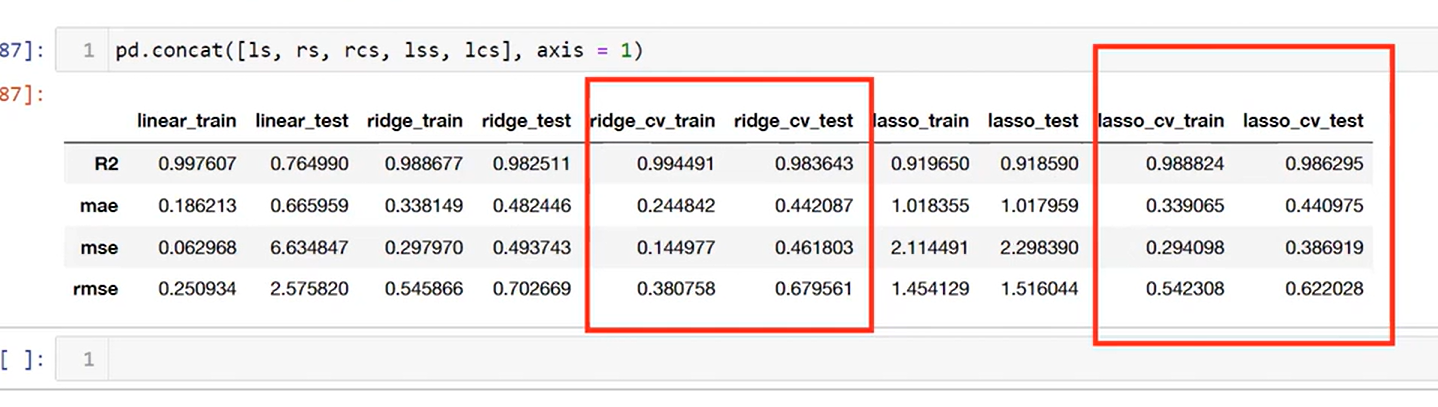

In [169]:
lasso_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [170]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [171]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef_,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01
0,13.942084,3.428822,6.383047,0.696016,4.270214
1,-3.147845,0.689086,0.709275,0.000000,0.180374
2,0.622117,0.170305,0.478838,0.000000,0.139659
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055
4,17.227695,2.723077,3.997813,3.490946,4.153400
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000


# Elastic net

In [172]:

from sklearn.linear_model import ElasticNet, ElasticNetCV

elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) # 0,5   ridge ve lasso ya eşit   dur davran diyoruz
elastic_model.fit(X_train_scaled, y_train)
#0  a  giderse   ridge
#1 e  giderse  lasso  olacak
# ridge ve  lasso  yu  ikisinin karışımı  datama davarnırken  ikisi gibi  davranıyor

ElasticNet(alpha=1, random_state=42)

In [173]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [174]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es
# eğitim yaptık ve skorlarımızı aldık
# skorları yorumlarsak uyumlu  train düşük test yüksek çıktı  bütün olarak  değerlendireecğiz

,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


In [175]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295,0.896126,0.902016
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975,1.248480,1.200654
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919,2.733565,2.766287
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028,1.653350,1.663216


In [176]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [177]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.915497,-1.255282,-2.567362,-1.602299
2,0.928138,-0.960011,-1.620225,-1.272881
3,0.855390,-1.373843,-4.014250,-2.003559
4,0.875648,-1.431847,-3.384817,-1.839787
5,0.840262,-1.449269,-2.953597,-1.718603


In [178]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()
# ortalamalrını alıyoruz manule olarak

test_r2                             0.882987
test_neg_mean_absolute_error       -1.294050
test_neg_mean_squared_error        -2.908050
test_neg_root_mean_squared_error   -1.687426
dtype: float64

In [179]:
elastic_model.coef_
# katsayılarına bakıyoruz

array([ 0.8629361 ,  0.2114429 ,  0.        ,  0.29076735,  0.98099122,
        0.00249769,  0.        ,  0.        ,  0.        ,  0.        ,
        0.52021768,  0.        ,  0.6023984 ,  0.09615974,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.15970242,  0.        ,  0.27423182,  0.        ,  0.        ,
        0.3407246 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0826519 ,  0.        ,  0.        ,  0.        ,  0.15709256,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [180]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])
# df halinde gördük

In [182]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)
#concat  yaptık
# cv  yapılmışalarını  kıyasladık
# indextekin   ridge  lasso da tuttu  es de  kesti

,lm_coef_,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,13.942084,3.428822,6.383047,0.696016,4.270214,0.862936
1,-3.147845,0.689086,0.709275,0.000000,0.180374,0.211443
2,0.622117,0.170305,0.478838,0.000000,0.139659,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055,0.290767
4,17.227695,2.723077,3.997813,3.490946,4.153400,0.980991
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000,0.002498
6,14.688014,-0.404686,-0.509197,0.000000,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000,0.000000


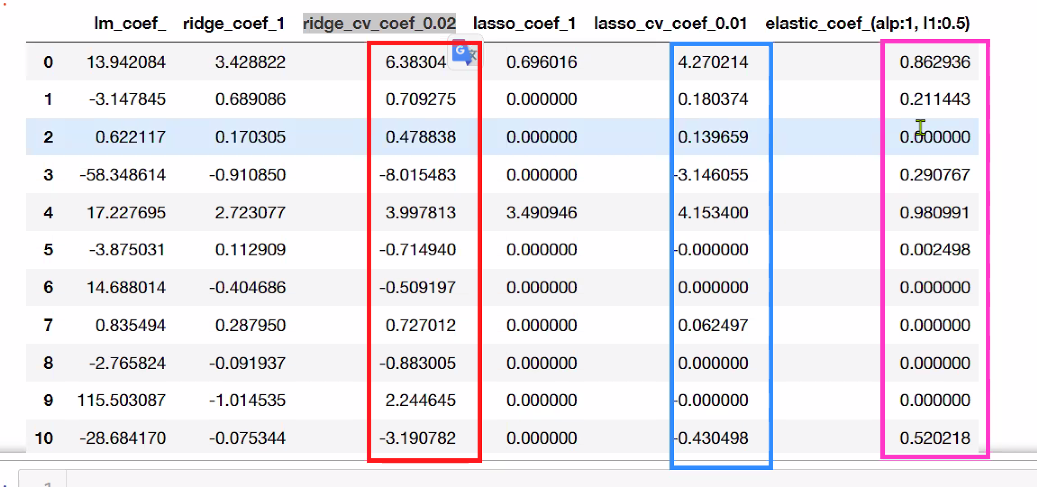

In [183]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5,
                                max_iter = 100000,random_state=42)

In [184]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [185]:
elastic_cv_model.alpha_

0.01

In [186]:
elastic_cv_model.l1_ratio_ # 1 = lasso  0= ridge

1.0

In [187]:
elastic_cv_model.mse_path_
elastic_cv_model.mse_path_[5][-1].mean()

0.41183329807027824

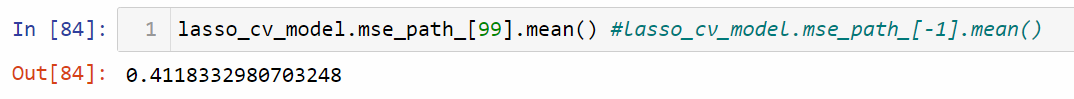

In [188]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [189]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


In [190]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295,0.896126,0.902016,0.988824,0.986295
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975,1.248480,1.200654,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919,2.733565,2.766287,0.294098,0.386919
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028,1.653350,1.663216,0.542308,0.622028


In [191]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [192]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)


,lm_coef_,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.01, l1:1)"
0,13.942084,3.428822,6.383047,0.696016,4.270214,0.862936,4.270214
1,-3.147845,0.689086,0.709275,0.000000,0.180374,0.211443,0.180374
2,0.622117,0.170305,0.478838,0.000000,0.139659,0.000000,0.139659
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055,0.290767,-3.146055
4,17.227695,2.723077,3.997813,3.490946,4.153400,0.980991,4.153400
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000,0.002498,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497,0.000000,0.062497
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000,0.000000,-0.000000


 # Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [ ]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [ ]:
# fit ediyoruz
grid_model.fit(X_train_scaled, y_train)
# alfa  
# projede  en az  2 ay burada  geçer

In [ ]:
grid_model.best_params_
# bize en iyi paramları söylüyor

In [ ]:
pd.DataFrame(grid_model.cv_results_)

In [ ]:
grid_model.best_index_

In [ ]:
grid_model.best_score_

# Using Best Hyper Parameters From GridSearch

In [ ]:


y_pred = grid_model.predict(X_test_scaled) #ElasticNet(alpha=0.01, l1_ratio=0.1) olarakta yazabilirsiniz aynı anlama geliyor.
y_train_pred = grid_model.predict(X_train_scaled)

train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

# Final Model

In [ ]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [ ]:
final_model = Lasso(alpha=0.01) 

In [ ]:
final_model.fit(X_scaled,y)

# Feature importeances with Ridge

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz #figsize gibi işlem yapıyor görseli büyütmek için import ediyoruz altta 720, 3000 dedik
viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns) #modeli veriyorum ve X_train column namelerini
visualizer = RadViz(size=(500, 1000))
viz.fit(X_train, y_train)
viz.show()

# Feature İmportance with Lasso

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(500, 1000))
viz.fit(X_train, y_train)
viz.show()